# Sales Analysis

### Importing Necessary Libraries

In [129]:
import pandas as pd
import os

#### Task #1: Merging 12 months of sales data into a single CSV file

In [130]:
files = [file for file in os.listdir("./Sales_Data")] ## reading all files

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([ all_months_data , df])

all_months_data.to_csv("all_data.csv" , index=False)

### Read in updated dataframe

In [131]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the DATA!

The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

### Drop Rows of NAN

In [132]:
nan_df = all_data[all_data.isna().any(axis=1)] ##getting rows with NaN.
nan_df.head()

all_data = all_data.dropna(how="all") ##dropping rows which contain NaN
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'or' and delete it

In [133]:
# temp_df = all_data.loc[all_data["Order Date"].str[0:2] == "Or"]
# temp_df.head()

all_data= all_data.loc[all_data["Order Date"].str[0:2] != "Or"]   ##removing rows having 'Or'
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Convert columns to correct type

In [134]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) # Make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])  # Make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns

### Task 2: Add Month column

In [140]:
all_data["Month"] = all_data["Order Date"].str[0:2]## taking first two characters from the order data in order to get month of purchase and place it in the Month column which was created.
all_data["Month"] = all_data["Month"].astype("int32")  ## converting str to int.
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,City,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,Dallas (TX),23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,Boston (MA),99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,Los Angeles (CA),600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,Los Angeles (CA),11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,Los Angeles (CA),11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a sales column

In [136]:
all_data ["Sales"] = all_data["Quantity Ordered"].astype('int') * all_data["Price Each"].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Add a city column

In [137]:
# Let's use the .apply() :

def get_city(address):
    return address.split(",")[1]

def get_state(address):
     return address.split(",")[2].split(" ")[1] ##splitting further to get only the state name and not the pincode.

all_data["City"] = all_data["Purchase Address"].apply(lambda x : get_city(x) + " (" + get_state(x) + ")") ## lambda x is used to allow us grab the cell constants.
                                                                                                   ## whenever we need to actually do something on a cells content we use lamda x a notation.  
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Rearranging Columns

In [138]:
# cols = all_data.columns.tolist() ## getting columns list
cols = list(all_data.columns.values) ## converting columns into a list
all_data = all_data[cols[0:4] +[cols[-1]] + [cols[-2]] + cols[4:6]]
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,City,Sales,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,Dallas (TX),23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,Boston (MA),99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,Los Angeles (CA),600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,Los Angeles (CA),11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,Los Angeles (CA),11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Question 1: What was the best month for sales? How much was earned that month?


In [141]:
results = all_data.groupby("Month").sum()
results

# Ans) DECEMBER was the best month for sales.

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Visualizing Our Results

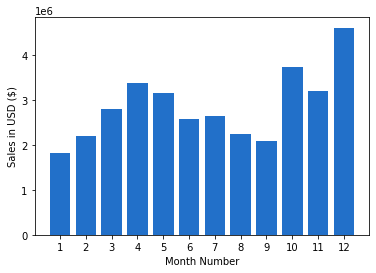

In [142]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results["Sales"] , color ="#2270c9")
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")
plt.show()

### What city had the highest number of sale?

In [143]:
results = all_data.groupby("City").sum()
results
# Ans) SF was the best City for sales.

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


### Plotting the results

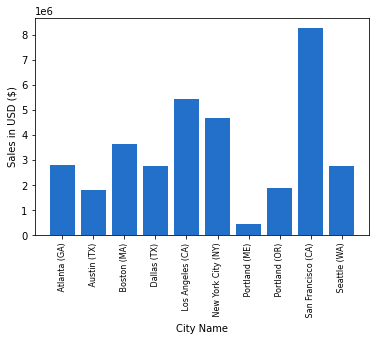

In [144]:
import matplotlib.pyplot as plt

cities = [city for city ,df  in all_data.groupby("City")] ## using list comprehension
# print(cities)
plt.bar(cities, results["Sales"] , color ="#2270c9")
plt.xticks(cities , rotation = "vertical" , size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
plt.show()

### Quesion 3: What time should we display advertisements to maximize likelihood of cutomers buying product?

In [145]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])  ## converting order date into a date time object using datetime library. 

In [147]:
all_data["Hour"] = all_data["Order Date"].dt.hour ## getting hour from the time
all_data["Minute"] = all_data["Order Date"].dt.minute 
all_data['Count'] = 1
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,City,Sales,Order Date,Purchase Address,Month,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,Dallas (TX),23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,Boston (MA),99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,1
3,176560,Google Phone,1,600.00,Los Angeles (CA),600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
4,176560,Wired Headphones,1,11.99,Los Angeles (CA),11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
5,176561,Wired Headphones,1,11.99,Los Angeles (CA),11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,1


In [148]:
all_data.groupby(["Hour"]).count()

,Order ID,Product,Quantity Ordered,Price Each,City,Sales,Order Date,Purchase Address,Month,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


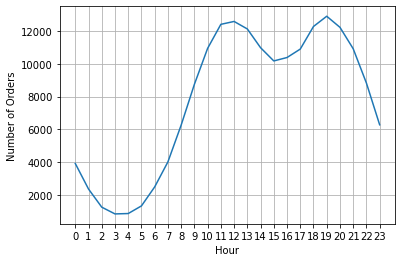

In [149]:
hours = [hour for hour,df in all_data.groupby("Hour")]
plt.plot(hours,all_data.groupby(["Hour"]).count()["Count"])
# all_data.groupby(["Hour"]).count()
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()

plt.show()

## Ans) Around 11am or 7pm.


### Question 4: What products are most often sold together?

In [49]:
## To solve this problem we need to find products having same Order ID.
## products having same order ID means they were ordered together.

In [150]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,City,Sales,Order Date,Purchase Address,Month,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,Dallas (TX),23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,Boston (MA),99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,1
3,176560,Google Phone,1,600.00,Los Angeles (CA),600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
4,176560,Wired Headphones,1,11.99,Los Angeles (CA),11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
5,176561,Wired Headphones,1,11.99,Los Angeles (CA),11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,1


In [152]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data["Order ID"].duplicated(keep=False)] ## getting list of duplicate values
                                                           ## keep = false means this considers all of the same values as duplicates. 

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby    
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x)) ## use transform method to join values from two rows into a single row.
df = df[["Order ID" , "Grouped"]].drop_duplicates()
df.head()

<ipython-input-152-dec3f07c67ed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x)) ## use transform method to join values from two rows into a single row.


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [153]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter
##counting number of pairs.
count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2))) # 2 is used to get a pair of two items.
    
for key,value in count.most_common(10):
    print(key,value)

## ANS) ('iPhone', 'Lightning Charging Cable') 1005

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

In [154]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,City,Sales,Order Date,Purchase Address,Month,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,Dallas (TX),23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,Boston (MA),99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,1
3,176560,Google Phone,1,600.00,Los Angeles (CA),600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
4,176560,Wired Headphones,1,11.99,Los Angeles (CA),11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,1
5,176561,Wired Headphones,1,11.99,Los Angeles (CA),11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,1


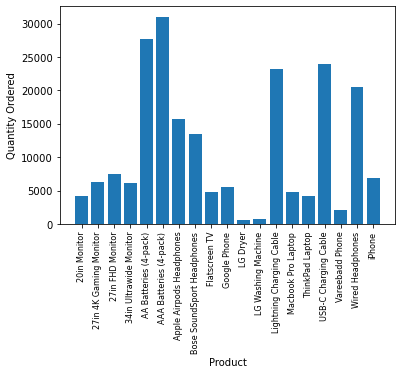

In [155]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product ,df  in product_group]

plt.bar(products , quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products , rotation = "vertical" , size = 8)

plt.show()


<ipython-input-156-91cee4c16e54>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = "vertical" , size = 8)


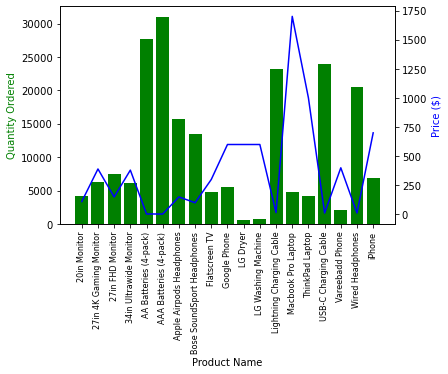

In [156]:
prices = all_data.groupby("Product").mean()["Price Each"]

## Adding a Y axis label to secondary y-axis in matplotlib.
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products , quantity_ordered , color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation = "vertical" , size = 8)
plt.show()